### 几何均值，算术均值，谐波，逆谐波处理 

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

rows 448,cols 464


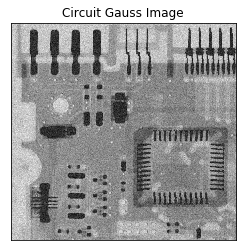

In [2]:
circuitGaussImg = cv2.imread('images/circuit_gauss.tif',0)
assert circuitGaussImg.ndim == 2, 'img should be gray.'
rows,cols = circuitGaussImg.shape[:2]
print('rows %s,cols %s' % (rows,cols))
plt.title('Circuit Gauss Image'), plt.xticks([]), plt.yticks([])
plt.imshow(circuitGaussImg, cmap = 'gray')

rows 448,cols 464


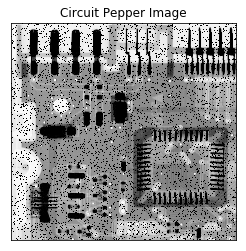

In [3]:
circuitPepperImg = cv2.imread('images/circuit_pepper.tif',0)
assert circuitPepperImg.ndim == 2, 'img should be gray.'
rows,cols = circuitPepperImg.shape[:2]
print('rows %s,cols %s' % (rows,cols))
plt.title('Circuit Pepper Image'), plt.xticks([]), plt.yticks([])
plt.imshow(circuitPepperImg, cmap = 'gray')

rows 448,cols 464


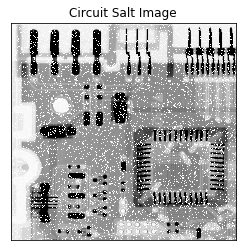

In [4]:
circuitSaltImg = cv2.imread('images/circuit_salt.tif',0)
assert circuitSaltImg.ndim == 2, 'img should be gray.'
rows,cols = circuitSaltImg.shape[:2]
print('rows %s,cols %s' % (rows,cols))
plt.title('Circuit Salt Image'), plt.xticks([]), plt.yticks([])
plt.imshow(circuitSaltImg, cmap = 'gray')

In [5]:
def GeometricMeanOperator(array):
    array = array.astype(np.float64)
    p = np.prod(array)
    return p**(1/(array.shape[0]*array.shape[1]))

In [6]:
def GeometricMeanFilter(image):
    newImage = np.zeros(image.shape)
    image = np.pad(image, ((1,1)), 'edge')
    rows,cols = image.shape[:2]
    for i in range (1, rows-1):
        for j in range (1, cols-1): 
            newImage[i-1,j-1] = GeometricMeanOperator(image[i-1:i+2,j-1:j+2])
    return newImage.astype(np.uint8)

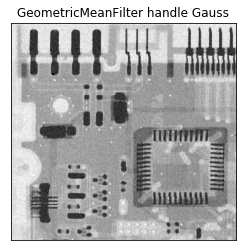

In [26]:
newImage = GeometricMeanFilter(circuitGaussImg)
plt.title('GeometricMeanFilter handle Gauss'), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap = 'gray')

In [8]:
def ArithmeticMeanOperator(array):
    return np.mean(array)

In [9]:
def ArithmeticMeanFilter(image):
    newImage = np.zeros(image.shape)
    image = np.pad(image, ((1,1)), 'edge')
    rows,cols = image.shape[:2]
    for i in range (1, rows-1):
        for j in range (1, cols-1): 
            newImage[i-1,j-1] = ArithmeticMeanOperator(image[i-1:i+2,j-1:j+2])
    return newImage.astype(np.uint8)

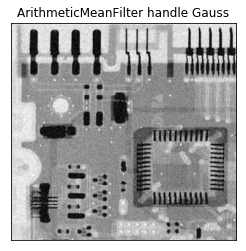

In [10]:
newImage = ArithmeticMeanFilter(circuitGaussImg)
plt.title('ArithmeticMeanFilter handle Gauss'), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap = 'gray')

In [11]:
def HarmonicMeanOperator(array):
    array = array.astype(np.float64)
    p = 1 / np.sum(1 / array)
    return p*(array.shape[0]*array.shape[1])

In [12]:
def HarmonicMeanFilter(image):
    newImage = np.zeros(image.shape)
    image = np.pad(image, ((1,1)), 'edge')
    rows,cols = image.shape[:2]
    for i in range (1, rows-1):
        for j in range (1, cols-1): 
            newImage[i-1,j-1] = HarmonicMeanOperator(image[i-1:i+2,j-1:j+2])
    return newImage.astype(np.uint8)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


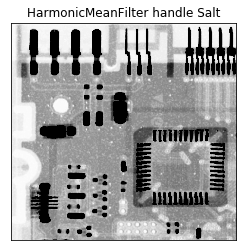

In [13]:
newImage = HarmonicMeanFilter(circuitSaltImg)
plt.title('HarmonicMeanFilter handle Salt'), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap = 'gray')

In [14]:
def InverseHarmonicMeanOperator(array,q):
    array = array.astype(np.float64)
    np.sum(array**(q+1))/ np.sum(array**(q))
    return np.sum(array**(q+1))/ np.sum(array**(q))

In [15]:
def InverseHarmonicMeanFilter(image,q):
    newImage = np.zeros(image.shape)
    image = np.pad(image, ((1,1)), 'edge')
    rows,cols = image.shape[:2]
    for i in range (1, rows-1):
        for j in range (1, cols-1): 
            newImage[i-1,j-1] = InverseHarmonicMeanOperator(image[i-1:i+2,j-1:j+2],q)
    return newImage.astype(np.uint8)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


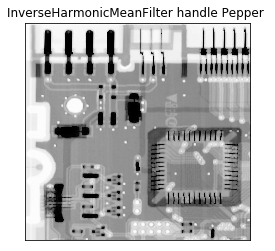

In [27]:
newImage = InverseHarmonicMeanFilter(circuitPepperImg,3)
plt.title('InverseHarmonicMeanFilter handle Pepper '), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap = 'gray')

In [17]:
arr1D = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
arr2D = arr1D
print(arr1D[:1])

[[1 2 3 4]]


In [18]:
arr1D = np.pad(arr1D, ((1,1)), 'edge')
print(arr1D)
print(arr2D)

[[1 1 2 3 4 4]
 [1 1 2 3 4 4]
 [1 1 2 3 4 4]
 [1 1 2 3 4 4]
 [1 1 2 3 4 4]
 [1 1 2 3 4 4]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [19]:
arr = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
recipArr = 1 / arr
print(recipArr)
su = np.sum(recipArr)
print(1/ su)

[[1.         0.5        0.33333333 0.25      ]
 [1.         0.5        0.33333333 0.25      ]
 [1.         0.5        0.33333333 0.25      ]
 [1.         0.5        0.33333333 0.25      ]]
0.12000000000000002
